In [2]:
import pandas as pd
import numpy as np

In [8]:
sample_data = pd.read_csv(r"C:\Users\m\project\공공데이터_상권분석\data\머신러닝\시계열모델용통합데이터_V0.2.csv")
# 데이터프레임에서 1000개의 행을 랜덤 샘플링
sampled_df = sample_data.sample(n=1000, random_state=42)  # random_state는 재현성을 위해 설정

In [9]:
sampled_df

,Unnamed: 0,날짜,자치구,총_결제금액,총_결제건수,평균기온,최저기온,최고기온,BSI,금리,...,일최소인구수,주간인구수,야간인구수,일최대이동인구수,서울외유입인구수,동일자치구행정동간이동인구수,자치구간이동인구수,연,월,일
13638,13638,2021-06-29,동작구,50580867.0,1584.0,23.9,21.3,28.4,74.2,0.50,...,358142.1383,3.631082e+05,409024.0444,165476.1451,29455.1373,71605.5996,64415.4082,2021,6,29
23193,23193,2022-07-16,관악구,77664541.0,3183.0,24.8,23.2,28.2,72.7,2.25,...,453885.7812,4.657090e+05,511225.7692,180423.8925,36669.3088,90508.8127,53245.7710,2022,7,16
26776,26776,2022-12-07,중구,3029940.0,149.0,4.9,1.2,9.0,68.4,3.25,...,222101.4533,4.699094e+05,263619.1702,352459.5836,99417.6260,30310.6962,222731.2614,2022,12,7
15413,15413,2021-09-08,동대문구,92242198.0,3520.0,22.2,19.0,26.9,70.9,0.75,...,369457.2902,3.756155e+05,380994.2164,192848.1879,35488.1514,75059.2661,82300.7704,2021,9,8
28966,28966,2023-03-04,강북구,162602002.0,3689.0,7.7,3.7,14.1,61.5,3.50,...,278019.1111,2.846387e+05,306641.8800,162107.0134,14940.4222,106277.2549,40889.3363,2023,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34765,34765,2023-10-22,강동구,69543615.0,2262.0,12.5,5.4,18.7,66.7,3.50,...,476389.1664,4.907521e+05,529027.4986,198032.4041,42510.4458,124284.4748,31237.4835,2023,10,22
27119,27119,2022-12-20,동작구,1783181.0,98.0,-3.2,-9.5,2.9,68.4,3.25,...,360330.0937,3.694812e+05,420919.9528,170150.3286,33031.7225,68256.5454,68862.0607,2022,12,20
39710,39710,2024-05-07,강남구,0.0,0.0,13.3,12.2,15.0,58.9,3.50,...,682211.3945,1.101313e+06,758775.1513,698796.1171,220756.0489,134172.4937,343867.5745,2024,5,7
5411,5411,2020-08-04,서대문구,96897029.0,3020.0,27.0,25.0,29.4,68.4,0.50,...,375286.6327,3.907398e+05,377575.6872,216762.9398,43319.4697,67298.0312,106145.4389,2020,8,4


In [11]:
sampled_df.to_csv(r"C:\Users\m\project\공공데이터_상권분석\data\머신러닝\시계열모델용통합데이터_test_V0.2.csv", index=False, encoding='utf-8-sig')

## 매출 예측 머신러닝

Mean Squared Error: 15841990750868694.00


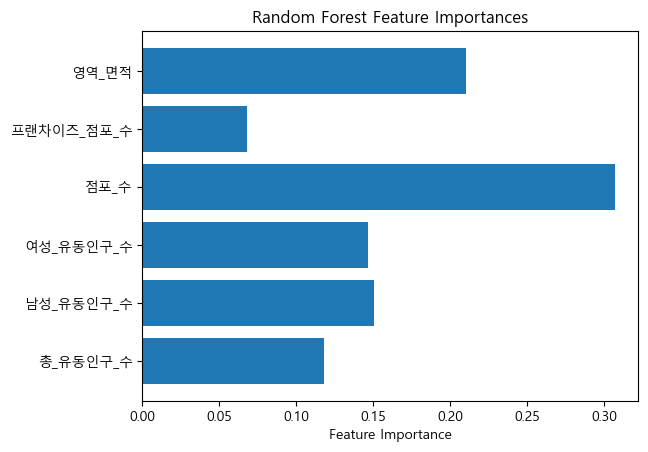

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# 데이터 로드
data = pd.read_csv(r"C:\Users\dlwlg\Desktop\피처엔지니어링한통합데이터\피처엔지니어링일단다한통합데이터.csv")

# 주요 변수 선택 (예: 상권 코드, 유동인구, 점포 수 등)
features = [
    '총_유동인구_수', '남성_유동인구_수', '여성_유동인구_수', 
    '점포_수', '프랜차이즈_점포_수', '영역_면적'
]
target = '당월_매출_금액'

# 결측치 처리
data = data.dropna(subset=features + [target])

# 독립 변수(X)와 종속 변수(y) 분리
X = data[features]
y = data[target]

# 데이터 분할 (훈련:테스트 = 8:2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 랜덤 포레스트 회귀 모델 학습
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 예측 및 평가
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

# 중요 변수 시각화
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'  # Windows의 경우
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

feature_importances = model.feature_importances_
plt.barh(features, feature_importances)
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importances")
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder

# 1. 데이터 불러오기 (파일 경로를 실제 데이터 파일로 변경)
data = pd.read_csv(r"C:\Users\dlwlg\Desktop\피처엔지니어링한통합데이터\피처엔지니어링일단다한통합데이터.csv")

# 2. 데이터 전처리
# 타겟 변수(매출 금액)의 결측치 제거
data = data.dropna(subset=['당월_매출_금액'])

# 숫자형 열만 선택하여 중앙값으로 결측치 채우기
numeric_columns = data.select_dtypes(include=['number']).columns
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].median())

# 범주형 데이터(문자열)를 숫자로 변환 (Label Encoding)
categorical_columns = data.select_dtypes(include=['object']).columns
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# 입력 변수(features)와 타겟 변수(target) 분리
features = data.drop(columns=['당월_매출_금액'])  # '당월_매출_금액' 제외
target = data['당월_매출_금액']

# 3. 학습 및 테스트 데이터 분할 (80% 학습, 20% 테스트)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# 4. 모델 생성 및 학습
model = RandomForestRegressor(random_state=42)  # 랜덤 포레스트 회귀 모델 초기화
model.fit(X_train, y_train)  # 모델 학습

# 5. 예측 수행
y_pred = model.predict(X_test)

# 6. 성능 평가
# RMSE 직접 계산
rmse = np.sqrt(np.mean((y_test.values - y_pred) ** 2))  # RMSE 계산
r2 = r2_score(y_test, y_pred)  # R² 계산

print(f"모델 성능 평가:\nRMSE: {rmse:.2f}\nR²: {r2:.2f}")

# 7. 예측값과 실제값 비교
y_test_vs_pred = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred})
print("\n예측값과 실제값 비교 (상위 10개):")
print(y_test_vs_pred.head(10))  # 상위 10개만 출력

# 필요시 CSV 파일로 저장 (옵션)
y_test_vs_pred.to_csv('predictions.csv', index=False)


## 2차 머신러닝

In [13]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# 데이터 로드
data = pd.read_csv(r"C:\Users\dlwlg\Desktop\머신러닝 사용 데이터\머신러닝용_시계열데이터.csv")

# 날짜를 datetime 형식으로 변환
data['날짜'] = pd.to_datetime(data['날짜'])

# 사용자 입력: 자치구 선택
user_gu = input("예측하고 싶은 자치구를 입력하세요: ")
filtered_data = data[data['자치구'] == user_gu]

if filtered_data.empty:
    print("입력한 자치구에 해당하는 데이터가 없습니다.")
else:
    # 날짜 기준 정렬
    filtered_data = filtered_data.sort_values(by='날짜')

    # 필요한 열 선택 (날짜와 다변량 변수)
    time_series_data = filtered_data[['날짜', '총_결제금액', '평균기온', '최저기온', '최고기온', '축제개수', '총생활인구수']].copy()
    time_series_data.set_index('날짜', inplace=True)

    # 결측값 처리 (0으로 대체)
    time_series_data.fillna(0, inplace=True)

    # 데이터 스케일링 (Min-Max Scaling)
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(time_series_data)

    # 시계열 데이터 생성 (윈도우 크기 설정)
    def create_sequences(data, window_size):
        X, y = [], []
        for i in range(window_size, len(data)):
            X.append(data[i-window_size:i, :-1])  # 마지막 열 제외 (타겟 변수 제외)
            y.append(data[i, -1])  # 마지막 열 (타겟 변수)
        return np.array(X), np.array(y)

    window_size = 30  # 최근 30일 데이터를 기반으로 예측
    X, y = create_sequences(scaled_data, window_size)

    # 훈련 및 테스트 데이터 분리
    train_size = int(len(X) * 0.8)
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]

    # LSTM 모델 구성
    model = Sequential([
        LSTM(64, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
        Dropout(0.2),
        LSTM(32, activation='relu'),
        Dropout(0.2),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')

    # 조기 종료 콜백 설정
    early_stopping = EarlyStopping(monitor='val_loss', patience=10)

    # 모델 학습
    model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50,
              batch_size=32, callbacks=[early_stopping], verbose=1)

    # 테스트 데이터에 대한 예측
    y_pred = model.predict(X_test)

    # 스케일 복원 (원래 값으로 변환)
    y_test_rescaled = scaler.inverse_transform(
        np.concatenate([np.zeros((len(y_test), scaled_data.shape[1] - 1)), y_test.reshape(-1, 1)], axis=1))[:, -1]
    
    y_pred_rescaled = scaler.inverse_transform(
        np.concatenate([np.zeros((len(y_pred), scaled_data.shape[1] - 1)), y_pred], axis=1))[:, -1]

    # 평가 지표 계산
    mae = mean_absolute_error(y_test_rescaled, y_pred_rescaled)
    rmse = np.sqrt(mean_squared_error(y_test_rescaled, y_pred_rescaled))
    r2 = r2_score(y_test_rescaled, y_pred_rescaled)

    print("\n모델 평가:")
    print(f"MAE (평균 절대 오차): {mae:.2f}")
    print(f"RMSE (평균 제곱근 오차): {rmse:.2f}")
    print(f"R² (결정계수): {r2:.4f}")

    # 예측
    predictions = model.predict(X_test)
    
    # 스케일 복원 (원래 값으로 변환)
    predictions_rescaled = scaler.inverse_transform(
        np.concatenate([np.zeros((len(predictions), scaled_data.shape[1] - 1)), predictions], axis=1))[:, -1]

    # 마지막 날짜 이후의 매출 예측
    last_date = time_series_data.index[-1]
    next_date = last_date + pd.Timedelta(days=1)
    
    print(f"\n[{user_gu}]의 마지막 날짜: {last_date.strftime('%Y-%m-%d')}")
    print(f"예상 총 결제 금액 ({next_date.strftime('%Y-%m-%d')}): {predictions_rescaled[-1]:,.0f} 원")


Epoch 1/50


C:\Users\dlwlg\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.1538 - val_loss: 0.0570
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0465 - val_loss: 0.0425
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0401 - val_loss: 0.0343
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0346 - val_loss: 0.0398
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0365 - val_loss: 0.0406
Epoch 6/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0373 - val_loss: 0.0337
Epoch 7/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0361 - val_loss: 0.0361
Epoch 8/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0356 - val_loss: 0.0465
Epoch 9/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0350 - val_loss: 0.0916
Epoch 10/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0341 - val_loss: 0.3958
Epoch 11/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0338 - val_loss: 2415.3757
Epoch 12/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0331 - val_loss: 0.0

In [ ]:
data = pd.read_csv(r"C:\Users\dlwlg\Desktop\머신러닝 사용 데이터\머신러닝용_시계열데이터.csv")